In [228]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [229]:
temp = pd.read_csv('./epass/data/1_used_car_prices.csv')
# names = ['',...] 로 불러올때 컬럼명을 지정할 수 있다.
temp = temp.dropna(ignore_index=True)
# temp = temp.dropna()    # 인덱스에 결번호가 생김
print(temp.info())
print(temp.select_dtypes(include='object').nunique())
print(temp.select_dtypes(include='object').value_counts())
print(temp.brand.unique())
print(temp.brand.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                883 non-null    object 
 1   age_years            883 non-null    float64
 2   mileage_km           883 non-null    float64
 3   engine_type          883 non-null    object 
 4   engine_size_cc       883 non-null    float64
 5   horsepower           883 non-null    float64
 6   fuel_efficiency_kml  883 non-null    float64
 7   accident_count       883 non-null    float64
 8   color                883 non-null    object 
 9   option_grade         883 non-null    object 
 10  price_krw            883 non-null    float64
dtypes: float64(7), object(4)
memory usage: 76.0+ KB
None
brand           4
engine_type     4
color           4
option_grade    3
dtype: int64
brand  engine_type  color  option_grade
A사     하이브리드        기타     중급              13
B사     전기       

In [230]:
# 100개의 행을 선택하여 복사
df1 = temp[0:100].copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                100 non-null    object 
 1   age_years            100 non-null    float64
 2   mileage_km           100 non-null    float64
 3   engine_type          100 non-null    object 
 4   engine_size_cc       100 non-null    float64
 5   horsepower           100 non-null    float64
 6   fuel_efficiency_kml  100 non-null    float64
 7   accident_count       100 non-null    float64
 8   color                100 non-null    object 
 9   option_grade         100 non-null    object 
 10  price_krw            100 non-null    float64
dtypes: float64(7), object(4)
memory usage: 8.7+ KB


In [231]:
# 인덱스 0 부터 100 까지 선택하여 복사
# 인덱스 100을 포함한다.  따라서 초기화된 인덱스라면 101개의 행이 선택된다.
# .loc 는 Selection by label
df1 = temp.loc[0:100].copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                101 non-null    object 
 1   age_years            101 non-null    float64
 2   mileage_km           101 non-null    float64
 3   engine_type          101 non-null    object 
 4   engine_size_cc       101 non-null    float64
 5   horsepower           101 non-null    float64
 6   fuel_efficiency_kml  101 non-null    float64
 7   accident_count       101 non-null    float64
 8   color                101 non-null    object 
 9   option_grade         101 non-null    object 
 10  price_krw            101 non-null    float64
dtypes: float64(7), object(4)
memory usage: 8.8+ KB


In [232]:
# 인덱스 번호 순서대로 0부터 100 까지 선택하여 복사
# temp[0:100] 과 동일
# iloc 는 Selection by position
df1 = temp.iloc[0:100].copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                100 non-null    object 
 1   age_years            100 non-null    float64
 2   mileage_km           100 non-null    float64
 3   engine_type          100 non-null    object 
 4   engine_size_cc       100 non-null    float64
 5   horsepower           100 non-null    float64
 6   fuel_efficiency_kml  100 non-null    float64
 7   accident_count       100 non-null    float64
 8   color                100 non-null    object 
 9   option_grade         100 non-null    object 
 10  price_krw            100 non-null    float64
dtypes: float64(7), object(4)
memory usage: 8.7+ KB


In [233]:
df_a = pd.DataFrame([[23,'남'],[55,'남'],[31,'여']], columns=['나이','성별'], index=['홍길동','이순신','강감찬'])
df_b = pd.DataFrame([['서울',3],['경기',1]], columns=['주소','학년'], index=['홍길동','강감찬'])

In [234]:
df_a

,나이,성별
홍길동,23,남
이순신,55,남
강감찬,31,여


In [235]:
df_b

,주소,학년
홍길동,서울,3
강감찬,경기,1


In [236]:
# concat(axis=1)은 row 인덱스가 같은 데이터끼리 열방향으로 결합
pd.concat([df_a, df_b], axis=1)

,나이,성별,주소,학년
홍길동,23,남,서울,3.0
이순신,55,남,NaN,NaN
강감찬,31,여,경기,1.0


In [237]:
pd.concat([df_a, df_b], ignore_index=True, axis=1)
# ignore_index : bool, default False
#   If True, do not use the index values along the concatenation axis.
#   The resulting axis will be labeled 0, ..., n - 1.
#   This is useful if you are concatenating objects
#   where the concatenation axis does not have meaningful indexing information.
#   Note the index values on the other axes are still respected in the join.

,0,1,2,3
홍길동,23,남,서울,3.0
이순신,55,남,NaN,NaN
강감찬,31,여,경기,1.0


In [238]:
pd.concat([df_a, df_b], axis=1, join='inner')

,나이,성별,주소,학년
홍길동,23,남,서울,3
강감찬,31,여,경기,1


In [239]:
# concat(axis=0) 은 컬럼명이 같은 데이터끼리 행방향으로 결합
pd.concat([df_a, df_b], axis=0)

,나이,성별,주소,학년
홍길동,23.0,남,NaN,NaN
이순신,55.0,남,NaN,NaN
강감찬,31.0,여,NaN,NaN
홍길동,NaN,NaN,서울,3.0
강감찬,NaN,NaN,경기,1.0


In [240]:
df = temp.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                883 non-null    object 
 1   age_years            883 non-null    float64
 2   mileage_km           883 non-null    float64
 3   engine_type          883 non-null    object 
 4   engine_size_cc       883 non-null    float64
 5   horsepower           883 non-null    float64
 6   fuel_efficiency_kml  883 non-null    float64
 7   accident_count       883 non-null    float64
 8   color                883 non-null    object 
 9   option_grade         883 non-null    object 
 10  price_krw            883 non-null    float64
dtypes: float64(7), object(4)
memory usage: 76.0+ KB


In [241]:
df.groupby(['brand','color']).size()

brand  color
A사     검정       84
       기타       83
       은색       64
       흰색       58
B사     검정       81
       기타       58
       은색       65
       흰색       51
C사     검정       47
       기타       35
       은색       37
       흰색       43
D사     검정       47
       기타       41
       은색       49
       흰색       40
dtype: int64

In [242]:
(df.groupby(['brand','color'])[['age_years','price_krw']].mean()).round(2)
# 여러개의 컬럼을 선택할때는 [] 내부에 리스트로 전달한다.


age_years  price_krw
brand color                      
A사    검정          6.65    1611.19
      기타          7.76    1137.24
      은색          7.69     911.22
      흰색          7.45    1234.09
B사    검정          6.67    1519.23
      기타          6.91    1490.07
      은색          6.45    1587.82
      흰색          6.39    1999.78
C사    검정          6.68    1489.55
      기타          6.34    1645.06
      은색          7.08    1429.54
      흰색          6.67    1267.44
D사    검정          7.94    1003.32
      기타          6.90    1657.07
      은색          7.69    1236.73
      흰색          7.32    1113.60

DataFrame.unstack(level=-1, fill_value=None, sort=True)

- Pivot a level of the (necessarily hierarchical) index labels.

- Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

- If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex).

In [243]:
df.groupby(['brand','color'])['age_years'].sum().unstack('color')
# groupby 하면 계층색인이 된다. unstack()은 brand 는 row(행)인덱스, color 는 columns(열) 인덱스로 변환한다.

color,검정,기타,은색,흰색
brand,,,,
A사,559.0,644.0,492.0,432.0
B사,540.0,401.0,419.0,326.0
C사,314.0,222.0,262.0,287.0
D사,373.0,283.0,377.0,293.0


In [244]:
df.groupby(['brand','color'])['age_years'].sum().unstack('brand')
# 즉, unstack() 을 사용하여 wide 포맷으로 변환할 때 어떤 컬럼을 열 인덱스로 할지 지정한다.

brand,A사,B사,C사,D사
color,,,,
검정,559.0,540.0,314.0,373.0
기타,644.0,401.0,222.0,283.0
은색,492.0,419.0,262.0,377.0
흰색,432.0,326.0,287.0,293.0


Reshaping and pivot tables

pandas provides methods for manipulating a Series and DataFrame to alter the representation of the data for further data processing or data summarization.

    pivot() and pivot_table(): Group unique values within one or more discrete categories.

    stack() and unstack(): Pivot a column or row level to the opposite axis respectively.

    melt() and wide_to_long(): Unpivot a wide DataFrame to a long format.

    get_dummies() and from_dummies(): Conversions with indicator variables.

    explode(): Convert a column of list-like values to individual rows.

    crosstab(): Calculate a cross-tabulation of multiple 1 dimensional factor arrays.

    cut(): Transform continuous variables to discrete, categorical values

    factorize(): Encode 1 dimensional variables into integer labels.


In [245]:
data = {
    "value": range(12),
    "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
    "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
    }
df = pd.DataFrame(data)

In [246]:
df

,value,variable,date
0,0,A,2020-01-03
1,1,A,2020-01-04
2,2,A,2020-01-05
3,3,B,2020-01-03
4,4,B,2020-01-04
5,5,B,2020-01-05
6,6,C,2020-01-03
7,7,C,2020-01-04
8,8,C,2020-01-05
9,9,D,2020-01-03


In [247]:
pivoted = df.pivot(index="date", columns="variable", values="value")
pivoted

variable,A,B,C,D
date,,,,
2020-01-03,0,3,6,9
2020-01-04,1,4,7,10
2020-01-05,2,5,8,11


pivot_table()

While pivot() provides general purpose pivoting with various data types,

pandas also provides pivot_table() or pivot_table() for pivoting with aggregation of numeric data.

The function pivot_table() can be used to create spreadsheet-style pivot tables.

- .pivot()은 일반적인 피봇 기능이다.
- .pivot_table() 은 기본적으로 집계 함수를 적용한다.
- 모든 인자는 List 의 형태로 복수개 지정 가능하다.
- aggfunc='mean', dropna=True 이 기본값임.

In [248]:
import datetime
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["A", "B", "C"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": np.random.randn(24),
        "E": np.random.randn(24),
        "F": [datetime.datetime(2013, i, 1) for i in range(1, 13)]
        + [datetime.datetime(2013, i, 15) for i in range(1, 13)],
    }
)
df

,A,B,C,D,E,F
0,one,A,foo,1.123800,0.167005,2013-01-01
1,one,B,foo,-0.367984,-0.416144,2013-02-01
2,two,C,foo,0.463428,-0.083970,2013-03-01
3,three,A,bar,-2.064839,-0.215707,2013-04-01
4,one,B,bar,1.588320,-0.287945,2013-05-01
5,one,C,bar,-1.045784,-1.062356,2013-06-01
6,two,A,foo,-0.087507,-2.257070,2013-07-01
7,three,B,foo,0.154938,0.305630,2013-08-01
8,one,C,foo,0.518773,-0.196352,2013-09-01
9,one,A,bar,-1.940388,0.085868,2013-10-01


In [249]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])
# 범주별, 컬럼별 평균값을 구한다

C             bar       foo
A     B                    
one   A -2.152250  0.385488
      B  1.683884  1.331476
      C -1.136653  0.981306
three A -0.804325       NaN
      B       NaN  0.242596
      C -0.455641       NaN
two   A       NaN -0.520464
      B -0.456436       NaN
      C       NaN  0.168385

In [250]:
pd.pivot_table(
    df, values=["D", "E"],
    index=["B"],
    columns=["A", "C"],
    aggfunc="sum",
)


D                                                           E  \
A       one               three                 two                 one   
C       bar       foo       bar       foo       bar       foo       bar   
B                                                                         
A -4.304500  0.770975 -1.608650       NaN       NaN -1.040928 -0.697067   
B  3.367768  2.662953       NaN  0.485191 -0.912873       NaN -0.489995   
C -2.273307  1.962613 -0.911282       NaN       NaN  0.336769 -1.025986   

                                                     
A               three                 two            
C       foo       bar       foo       bar       foo  
B                                                    
A -0.708697 -1.365266       NaN       NaN -2.564386  
B -1.202662       NaN  3.404645  0.009924       NaN  
C  2.414722  1.206307       NaN       NaN  2.100225

In [251]:
pd.pivot_table(
    df, values="E",
    index=["B"],
    columns=["A"],
    aggfunc=["sum", "mean"],
)

sum                          mean                    
A       one     three       two       one     three       two
B                                                            
A -1.405764 -1.365266 -2.564386 -0.351441 -0.682633 -1.282193
B -1.692657  3.404645  0.009924 -0.423164  1.702322  0.004962
C  1.388736  1.206307  2.100225  0.347184  0.603154  1.050113

In [252]:
# The result is a DataFrame potentially having a MultiIndex on the index or column.
# If the values column name is not given, the pivot table
# will include all of the data in an additional level of hierarchy in the columns
pd.pivot_table(df[["A", "B", "C", "D", "E"]], index=["A", "B"], columns=["C"])
# D, E 컬럼이 values 로 자동 지정된다.

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -2.152250  0.385488 -0.348533 -0.354349
      B  1.683884  1.331476 -0.244997 -0.601331
      C -1.136653  0.981306 -0.512993  1.207361
three A -0.804325       NaN -0.682633       NaN
      B       NaN  0.242596       NaN  1.702322
      C -0.455641       NaN  0.603154       NaN
two   A       NaN -0.520464       NaN -1.282193
      B -0.456436       NaN  0.004962       NaN
      C       NaN  0.168385       NaN  1.050113

### .stack()

Stack the prescribed level(s) from columns to index
to display a pivoted DataFrame as having a multi-level index:

Return a reshaped DataFrame or Series having a multi-level index with one or more new inner-most levels compared to the current DataFrame. The new inner-most levels are created by pivoting the columns of the current dataframe:

  - if the columns have a single level, the output is a Series;
  - if the columns have multiple levels, the new index
    level(s) is (are) taken from the prescribed level(s) and
    the output is a DataFrame.

In [253]:
table = pd.pivot_table(df[["A", "B", "C", "D", "E"]], index=["A", "B"], columns=["C"])
print(table)
table = table.stack() # 기본값이 dropna=True, sort=True 이다.  future_stack=True 이면 dropna=False, sort=False 가 적용된다.
print(table)

                D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -2.152250  0.385488 -0.348533 -0.354349
      B  1.683884  1.331476 -0.244997 -0.601331
      C -1.136653  0.981306 -0.512993  1.207361
three A -0.804325       NaN -0.682633       NaN
      B       NaN  0.242596       NaN  1.702322
      C -0.455641       NaN  0.603154       NaN
two   A       NaN -0.520464       NaN -1.282193
      B -0.456436       NaN  0.004962       NaN
      C       NaN  0.168385       NaN  1.050113
                    D         E
A     B C                      
one   A bar -2.152250 -0.348533
        foo  0.385488 -0.354349
      B bar  1.683884 -0.244997
        foo  1.331476 -0.601331
      C bar -1.136653 -0.512993
        foo  0.981306  1.207361
three A bar -0.804325 -0.682633
      B foo  0.242596  1.702322
      C bar -0.455641  0.603154
two   A foo -0.520464 -1.282193
      B bar -0.456436  0.004962
      C 

In [254]:
table.unstack(level=1)
# leve=0 는 A, leve=1 은 B, level=2 는 C 로 멀티컬럼 인덱스로 변환한다.

D                             E                    
B                 A         B         C         A         B         C
A     C                                                              
one   bar -2.152250  1.683884 -1.136653 -0.348533 -0.244997 -0.512993
      foo  0.385488  1.331476  0.981306 -0.354349 -0.601331  1.207361
three bar -0.804325       NaN -0.455641 -0.682633       NaN  0.603154
      foo       NaN  0.242596       NaN       NaN  1.702322       NaN
two   bar       NaN -0.456436       NaN       NaN  0.004962       NaN
      foo -0.520464       NaN  0.168385 -1.282193       NaN  1.050113

In [255]:
df1 = df.groupby(['A', 'B'])['D'].sum().unstack('A')
df1

A,one,three,two
B,,,
A,-3.533525,-1.608650,-1.040928
B,6.030720,0.485191,-0.912873
C,-0.310694,-0.911282,0.336769


In [256]:
df2 = df.pivot_table(index=['A', 'B'], values='D', aggfunc='sum').unstack('A')
df2

D                    
A       one     three       two
B                              
A -3.533525 -1.608650 -1.040928
B  6.030720  0.485191 -0.912873
C -0.310694 -0.911282  0.336769

### 중요
.groupby() 와 .pivot_table() 은 동일한 결과를 만들 수 있다.

In [257]:
df1 = df.groupby(['B'])[['D','E']].sum()
df1

,D,E
B,,
A,-6.183103,-5.335416
B,5.603039,1.721913
C,-0.885207,4.695268


In [258]:
df2 = df.pivot_table(index=['B'], values=['D','E'], aggfunc='sum')
df2

,D,E
B,,
A,-6.183103,-5.335416
B,5.603039,1.721913
C,-0.885207,4.695268


In [259]:
# 큰 값 순위로 추출하기
df2.nlargest(2, 'D')

,D,E
B,,
B,5.603039,1.721913
C,-0.885207,4.695268


In [260]:
# groupby 도 여러가지 통계량을 한꺼번에 계산할 수 있다.
df1 = df.groupby(['B'])[['D','E']].agg(['min','max','sum','mean','std','var'])
df1

D                                                           E  \
        min       max       sum      mean       std       var       min   
B                                                                         
A -2.364112  1.123800 -6.183103 -0.772888  1.273411  1.621577 -2.257070   
B -1.368663  3.030937  5.603039  0.700380  1.378456  1.900141 -0.786518   
C -1.227522  1.443839 -0.885207 -0.110651  0.895073  0.801156 -1.062356   

                                                     
        max       sum      mean       std       var  
B                                                    
A  0.167005 -5.335416 -0.666927  0.794049  0.630514  
B  3.099015  1.721913  0.215239  1.221931  1.493115  
C  2.611074  4.695268  0.586908  1.239455  1.536249

In [261]:
df1.swaplevel(0,1, axis=1)  # 컬럼 인덱스의 레벨을 바꾼다.

,min,max,sum,mean,std,var,min,max,sum,mean,std,var
,D,D,D,D,D,D,E,E,E,E,E,E
B,,,,,,,,,,,,
A,-2.364112,1.123800,-6.183103,-0.772888,1.273411,1.621577,-2.257070,0.167005,-5.335416,-0.666927,0.794049,0.630514
B,-1.368663,3.030937,5.603039,0.700380,1.378456,1.900141,-0.786518,3.099015,1.721913,0.215239,1.221931,1.493115
C,-1.227522,1.443839,-0.885207,-0.110651,0.895073,0.801156,-1.062356,2.611074,4.695268,0.586908,1.239455,1.536249


In [262]:
df1.swaplevel(0,1, axis=1).sort_index(axis=1)   # 컬럼 인덱스를 가나다 순으로 정렬한다.

max                mean                 min                 std  \
          D         E         D         E         D         E         D   
B                                                                         
A  1.123800  0.167005 -0.772888 -0.666927 -2.364112 -2.257070  1.273411   
B  3.030937  3.099015  0.700380  0.215239 -1.368663 -0.786518  1.378456   
C  1.443839  2.611074 -0.110651  0.586908 -1.227522 -1.062356  0.895073   

                  sum                 var            
          E         D         E         D         E  
B                                                    
A  0.794049 -6.183103 -5.335416  1.621577  0.630514  
B  1.221931  5.603039  1.721913  1.900141  1.493115  
C  1.239455 -0.885207  4.695268  0.801156  1.536249

In [263]:
df.sort_values(by=['D','A'], axis=0, ascending=False)  # D 컬럼을 기준으로 내림차순 정렬

,A,B,C,D,E,F
13,one,B,foo,3.030937,-0.786518,2013-02-15
16,one,B,bar,1.779447,-0.202049,2013-05-15
4,one,B,bar,1.588320,-0.287945,2013-05-01
20,one,C,foo,1.443839,2.611074,2013-09-15
0,one,A,foo,1.123800,0.167005,2013-01-01
8,one,C,foo,0.518773,-0.196352,2013-09-01
2,two,C,foo,0.463428,-0.083970,2013-03-01
15,three,A,bar,0.456190,-1.149559,2013-04-15
22,two,B,bar,0.455790,0.328650,2013-11-15
19,three,B,foo,0.330254,3.099015,2013-08-15


In [264]:
# 컬럼이 계층형인경우 by = Tuple 로 지정하여 정렬
df1.sort_values(by=('D','min'), ascending=True)

D                                                           E  \
        min       max       sum      mean       std       var       min   
B                                                                         
A -2.364112  1.123800 -6.183103 -0.772888  1.273411  1.621577 -2.257070   
B -1.368663  3.030937  5.603039  0.700380  1.378456  1.900141 -0.786518   
C -1.227522  1.443839 -0.885207 -0.110651  0.895073  0.801156 -1.062356   

                                                     
        max       sum      mean       std       var  
B                                                    
A  0.167005 -5.335416 -0.666927  0.794049  0.630514  
B  3.099015  1.721913  0.215239  1.221931  1.493115  
C  2.611074  4.695268  0.586908  1.239455  1.536249

In [265]:
# 데이터 정규화
import random
df3 = pd.DataFrame(pd.Series(random.sample(range(1,1000),800)), columns=['score'])
df3

,score
0,28
1,891
2,396
3,457
4,450
5,353
6,977
7,463
8,172
9,136


In [266]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [267]:
mmscaler = MinMaxScaler()
df3['MinMax'] = mmscaler.fit_transform(df3)

In [268]:
df3

,score,MinMax
0,28,0.027136
1,891,0.894472
2,396,0.396985
3,457,0.458291
4,450,0.451256
5,353,0.353769
6,977,0.980905
7,463,0.464322
8,172,0.171859
9,136,0.135678


In [269]:
stdscaler = StandardScaler()
df3['StdScaled'] = stdscaler.fit_transform(df3[['score']])

In [270]:
df3

,score,MinMax,StdScaled
0,28,0.027136,-1.625227
1,891,0.894472,1.340721
2,396,0.396985,-0.360489
3,457,0.458291,-0.150845
4,450,0.451256,-0.174902
5,353,0.353769,-0.508271
6,977,0.980905,1.636285
7,463,0.464322,-0.130224
8,172,0.171859,-1.130330
9,136,0.135678,-1.254054


In [271]:
# titanic 데이터 전처리
# 결측치 처리 : KNN imputer 사용하는 방법
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.style.use('seaborn-v0_8')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [272]:
df = pd.read_csv('titanic.csv')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,F,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,True


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         723 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  deck        891 non-null    object 
 12  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 78.4+ KB


In [274]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols

['sex', 'embarked', 'class', 'who', 'deck']

In [275]:
print(df['sex'].value_counts())
print(df['embarked'].value_counts())
print(df['class'].value_counts())
print(df['who'].value_counts())
print(df['deck'].value_counts())

sex
male      577
female    314
Name: count, dtype: int64
embarked
S    644
C    168
Q     77
Name: count, dtype: int64
class
Third     491
First     216
Second    184
Name: count, dtype: int64
who
man      537
woman    271
child     83
Name: count, dtype: int64
deck
C    164
B    155
D    142
A    126
E    115
F     97
G     92
Name: count, dtype: int64


In [276]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           168
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck            0
alone           0
dtype: int64

In [277]:
df['survived'].value_counts(normalize=True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: ylabel='Frequency'>

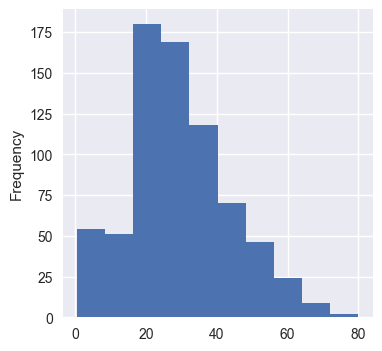

In [278]:
df['age'].plot(kind='hist', figsize=(4,4))

<Axes: xlabel='age'>

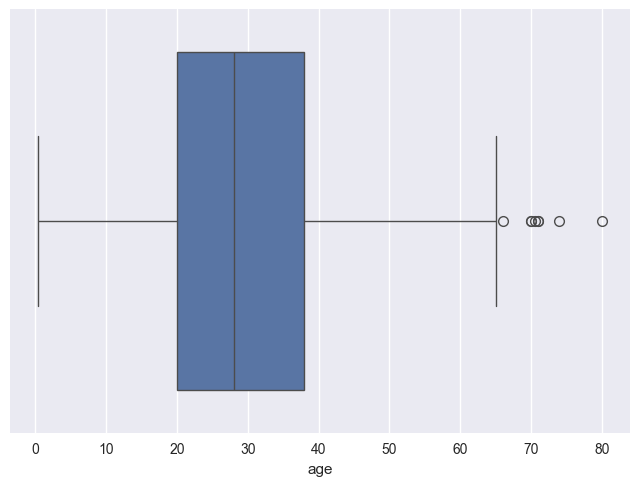

In [279]:
sns.boxplot(data=df, x='age')

<Axes: xlabel='sex'>

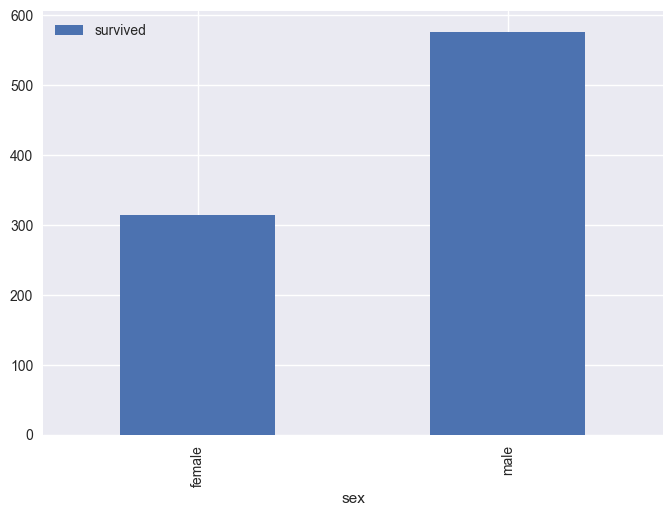

In [280]:
df.pivot_table(index='sex', values='survived', aggfunc='count').plot(kind='bar')

<Axes: xlabel='sex', ylabel='survived'>

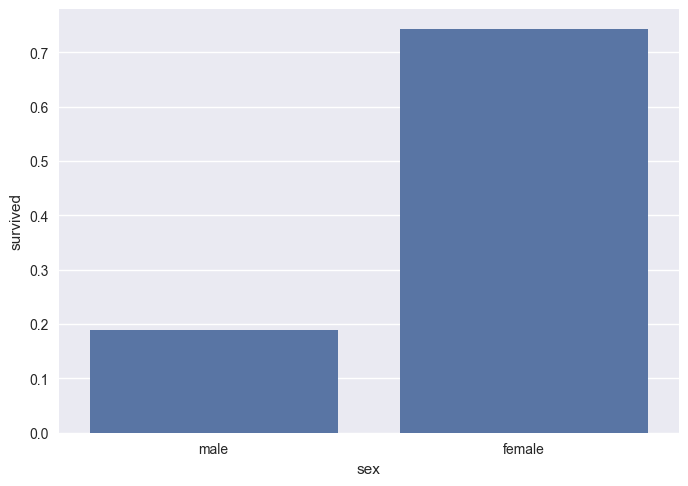

In [281]:
sns.barplot(df, x='sex', y='survived', estimator='mean', errorbar=None)

In [282]:
df.pivot_table(index='sex', columns='pclass', values='survived')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [283]:
pd.crosstab(index=df['sex'], columns=df['pclass'], values=df['survived'], aggfunc='mean')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [284]:
# 결측치 대치
# age 는 KNN imputer 로 대치(갯수가 많아서)
# embarked 는 결측치가 2개이므로 최빈값으로 대치
from sklearn.impute import KNNImputer
col_to_impute = ['age', 'sibsp', 'parch']   # 서로 관련이 있을법한 피처들을 포함한다
knn_imputer = KNNImputer(n_neighbors=10)
knn_result = knn_imputer.fit_transform(df[col_to_impute])
knn_result

array([[22.   ,  1.   ,  0.   ],
       [38.   ,  1.   ,  0.   ],
       [26.   ,  0.   ,  0.   ],
       ...,
       [20.792,  1.   ,  2.   ],
       [26.   ,  0.   ,  0.   ],
       [32.   ,  0.   ,  0.   ]], shape=(891, 3))

In [285]:
df['age'] = knn_result[:,0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  deck        891 non-null    object 
 12  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 78.4+ KB


In [286]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  deck        891 non-null    object 
 12  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 78.4+ KB


In [287]:
# 결측치를 모두 처리한 뒤, 범주형 데이터 전처리
# sex : 값이 2종류 이고 순서가 없으므로 0,1 또는 False, True 로 mapping
# embarked, who, deck : 순서가 없고 값이 여러개 이므로 OneHot 인코딩
# class : 순서가 있고 값이 3종류 이므로 Ordinal 인코딩
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,F,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,A,True


In [288]:
df['sex'] = df['sex'].replace({'male':1, 'female':0})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,F,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,A,True


In [289]:
# 그냥 전체 get_dummies(df) 하면, 원래 컬럼은 사라진다! (매우 주의!)
df_temp = pd.get_dummies(df)
# df_temp = pd.get_dummies(df, dtype=int) 로 하면 0,1 로 인코딩된다. 그러나 DNN 모델은 bool 도 숫자값으로 인식하므로 굳이...
df_temp.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,1,22.0,1,0,7.2500,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False
1,1,1,0,38.0,1,0,71.2833,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False
2,1,3,0,26.0,0,0,7.9250,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False
3,1,1,0,35.0,1,0,53.1000,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False
4,0,3,1,35.0,0,0,8.0500,True,True,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False


In [290]:
onehot_cols = ['embarked', 'who', 'deck']
onehot_encoded = pd.get_dummies(df[onehot_cols])
# onehot_encoded = pd.get_dummies(df[onehot_cols]).astype(int) # 정수값 0,1로 인코딩 할 수도 있다!
onehot_encoded.head()

,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,False,False,True,False,True,False,False,False,False,False,False,True,False
1,True,False,False,False,False,True,False,False,True,False,False,False,False
2,False,False,True,False,False,True,False,False,True,False,False,False,False
3,False,False,True,False,False,True,False,False,True,False,False,False,False
4,False,False,True,False,True,False,True,False,False,False,False,False,False


In [291]:
# ordinal 인코딩
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [292]:
# 여기서 OrdinalEncoder 사용법을 배운다.
from sklearn.preprocessing import OrdinalEncoder
class_order = ['First', 'Second', 'Third']
oe = OrdinalEncoder(categories=[class_order])
class_encoded = pd.DataFrame(oe.fit_transform(df[['class']]), columns=['class_encoded'])
class_encoded
# 그러나 그냥 .replace({}) 로 매핑하는게 쉽겠다

,class_encoded
0,2.0
1,0.0
2,2.0
3,0.0
4,2.0
5,2.0
6,0.0
7,2.0
8,2.0
9,1.0


In [293]:
class_encoded.value_counts()

class_encoded
2.0              491
0.0              216
1.0              184
Name: count, dtype: int64

In [294]:
df_final = pd.concat([df, onehot_encoded, class_encoded], axis=1)
df_final = df_final.drop(['embarked', 'who', 'deck', 'class'], axis=1)
df_final

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,class_encoded
0,0,3,1,22.000,1,0,7.2500,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,2.0
1,1,1,0,38.000,1,0,71.2833,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,0.0
2,1,3,0,26.000,0,0,7.9250,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,2.0
3,1,1,0,35.000,1,0,53.1000,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,0.0
4,0,3,1,35.000,0,0,8.0500,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,2.0
5,0,3,1,28.700,0,0,8.4583,True,True,False,True,False,False,True,False,False,False,False,True,False,False,False,2.0
6,0,1,1,54.000,0,0,51.8625,True,True,False,False,True,False,True,False,False,False,False,False,True,False,False,0.0
7,0,3,1,2.000,3,1,21.0750,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,2.0
8,1,3,0,27.000,0,2,11.1333,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,2.0
9,1,2,0,14.000,1,0,30.0708,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,1.0
